In [2]:
from music21 import *

In [3]:
i1 = interval.Interval('P5') # create an interval
print(i.niceName)
i2 = interval.Interval('P4')
i3 = interval.Interval('P1')
print(i3.niceName)
i4 = interval.Interval('A5')
print(i4.niceName)
i5 = interval.Interval('d5')
print(i5.niceName)


NameError: name 'i' is not defined

In [ ]:
print(i2.directedNiceName)
print(i2.reverse().directedNiceName)


Ascending Perfect Fourth
Descending Perfect Fourth


In [ ]:
c4 = note.Note(60)
print(c4.fullName)


In [ ]:
c4_transposed = c4.transpose(i1.reverse())  # Transpose c4 by the interval i1 (P5)
print(c4_transposed.fullName)

F in octave 3 Quarter Note


In [ ]:
print(c4.pitch.frequency)
print(c4.pitch.midi)
print(c4.pitch.pitchClass)  # MIDI class of the pitch
print(c4.quarterLength)


261.6255653005985
60
0
1.0


In [11]:
cs = note.Note('C#4')
cf = note.Note('C-4')
print(cf.pitch.midi)
print(note.Note("B3") == cf)
cq = note.Note("C~4")
print(cq.fullName)
cqf = note.Note("C`4")
print(cqf.fullName)


59
False
C-half-sharp in octave 4 Quarter Note
C-half-flat in octave 4 Quarter Note


In [ ]:
cs.show("midi")

In [ ]:
cs.show("musicxml.png")

In [ ]:
from showscore import show
cf.duration = duration.Duration(3.9)  # Set the duration of cf to 1.0 quarter notes
cfff = note.Note("C--4")
csss = note.Note("C##4")
i = interval.Interval(cfff, csss)
print(i.niceName)

Quadruply-Augmented Unison


In [4]:
score = converter.parse("Beethoven__Symphony_No._5_Op.67_Mvt._1.mscz.mxl")

In [8]:
score.analyze("key")

<music21.key.Key of c minor>

In [9]:
score.flatten().notes

<music21.stream.iterator.StreamIterator for Score:0x15cb2dccca0 @:0>

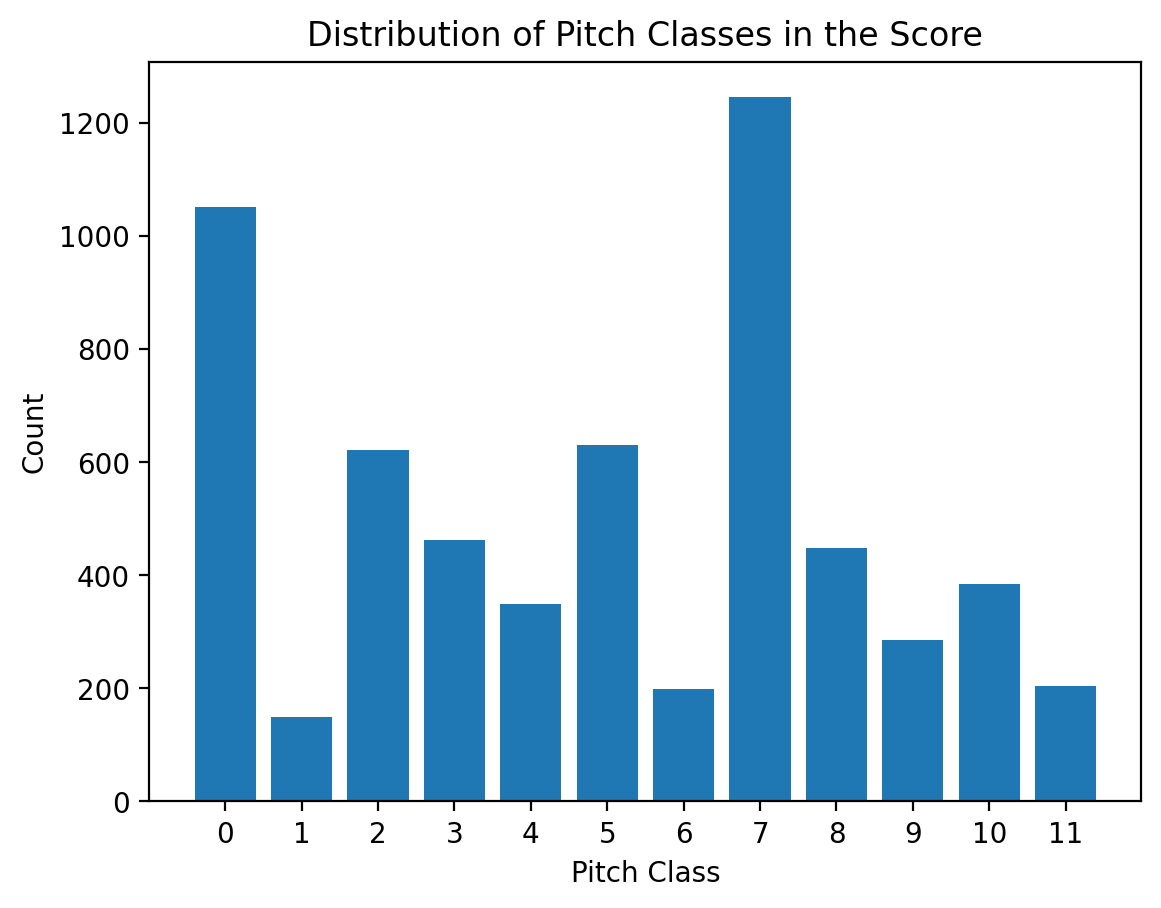

In [13]:
from collections import Counter

import matplotlib.pyplot as plt

# 获取乐谱中所有音符的 pitchClass
pitch_classes = [n.pitch.pitchClass for n in score.flatten().notes if isinstance(n, note.Note)]

# 统计每个 pitchClass 的出现次数
pitch_class_counts = Counter(pitch_classes)

# 绘制柱状图
plt.bar(pitch_class_counts.keys(), pitch_class_counts.values(), tick_label=list(pitch_class_counts.keys()))
plt.xlabel('Pitch Class')
plt.ylabel('Count')
plt.title('Distribution of Pitch Classes in the Score')
plt.show()

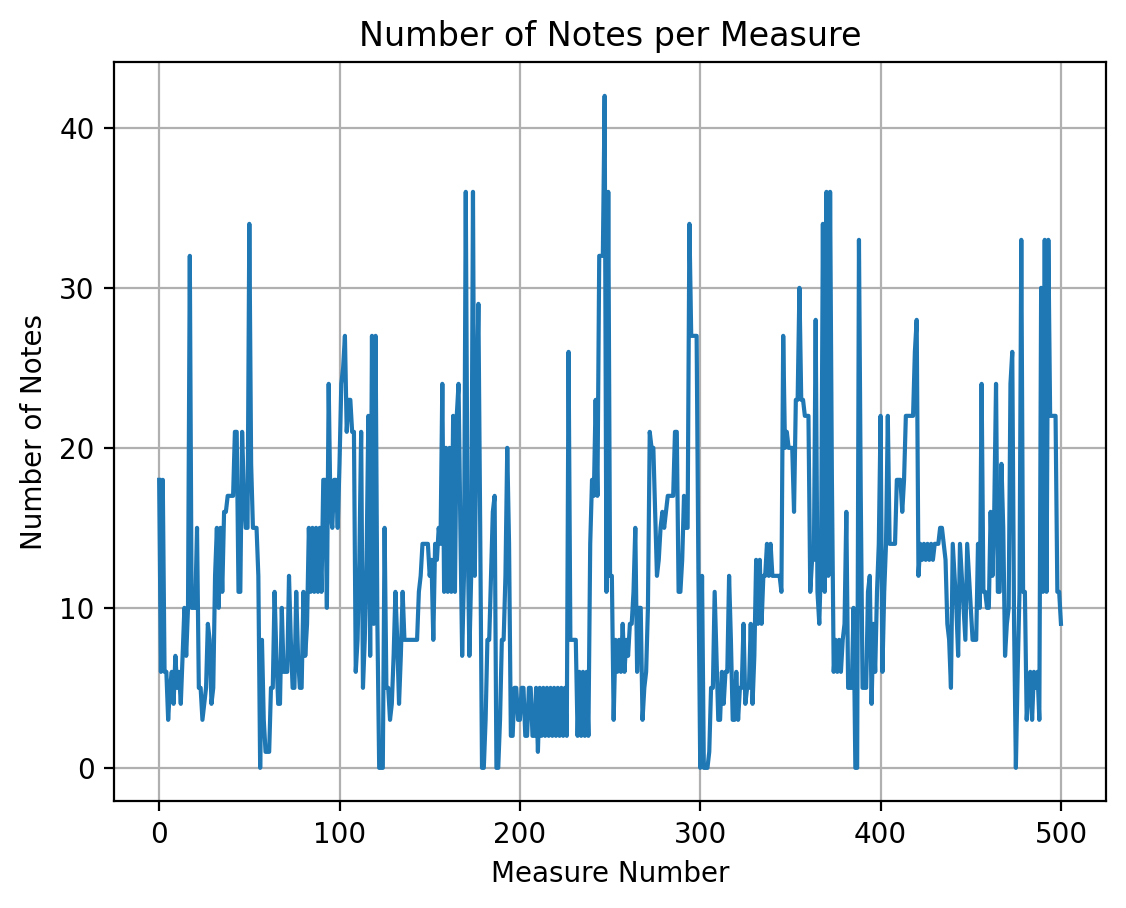

In [19]:
# 获取每个小节中的音符数量
all_parts_measures = [part.getElementsByClass('Measure') for part in score.parts]
measure_note_counts = [sum(len(measure.notes) for measure in part_measures) for part_measures in zip(*all_parts_measures)]
# 绘制每个小节的音符数量折线图
plt.plot(measure_note_counts)
plt.xlabel('Measure Number')
plt.ylabel('Number of Notes')
plt.title('Number of Notes per Measure')
plt.grid(True)
plt.show()
